# **Python for data science and data analysis from scratch**


## Predicción
Para esta sesión usaremos un dataset con los datos de los usuarios de un programa de uso de bicicletas compartidas en la ciudad de Washington y trataremos de pronosticar la demanda que tendrá el servicio en fechas futuras.

Este dataset se encuentra disponible de manera gratuita en el repositorio para aprendizaje de Machine Learning de la UCI en la siguiente liga: [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset ](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

Librerías que utilizaremos en esta sesión:

Numpy

Pandas

Seaborn

sklearn


---



Matplot

Librería para crear gráficas, puede ser usada con otras librerías de Python, como NumPy.


---



SciPy

Es una librería libre de código abierto, usada para cómputo científico y técnico. Contiene módulos para optimización, álgebra lineal, procesamiento de imágenes, entre otros.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [2]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8)}

plt.rcParams.update(params)


## Análisis y preprocesamiento de los datos

Primero vamos a leer el dataset y cargarlo en una variable, para ver cuántos registros y atributos contiene.



In [3]:
 hour_df = pd.read_csv('https://saturdays-ai.s3-us-west-2.amazonaws.com/hour.csv')
 hour_df.shape

(17379, 17)

In [4]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Al analizar los tipos de cada atributo nos damos cuenta que la columna de **dteday** fue leída como cadena y será necesario cambiarla a tipo **timestamp**. 

Los atributos de **season**, **holiday** y **weekday** fueron leídos como enteros y van a requerir ser convertidos a categorías para poder entenderlos apropiadamente.

Primero vamos a cambiar los nombres de los atributos para hacerlos más legibles:

In [6]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [8]:
# conversion de cadena a timestamp
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# conversion a tipo categoria
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [10]:
hour_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

## Distribución y tendencias

Ahora que preprocesamos nuestro dataset podemos visualizarlo. 

Vamos a empezar visualizando la distribución de viajes por hora durante las diferentes estaciones del año.

[Text(0.5, 1.0, 'Distribución por hora de los viajes de cada estación del año')]

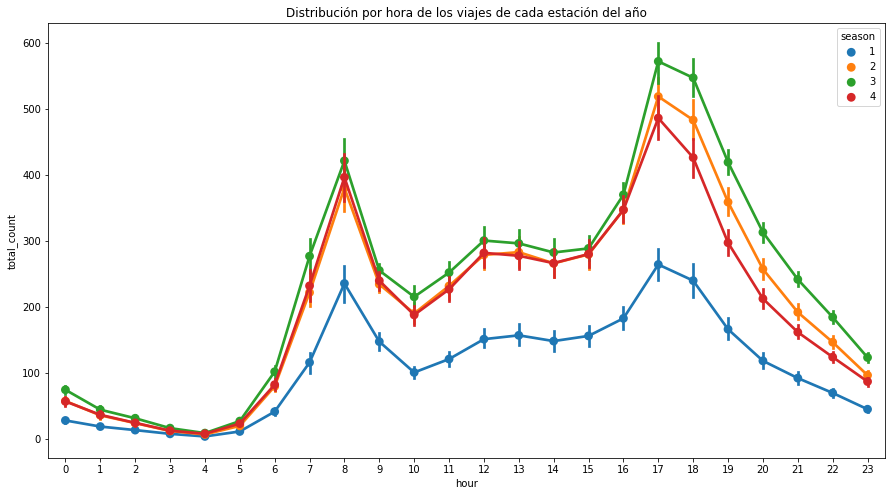

In [11]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Distribución por hora de los viajes de cada estación del año")


La gráfica nos muestra tendencias similares sin importar la estación del año, tenemos picos entre 7-9 am y entre 4-6 pm, posiblemente por los horarios de oficina.



Ejercicio
1. Crear una gráfica que muestre el número de viajes por día de la semana

2. Crear una gráfica para mostrar la cantidad de viajes por mes

[Text(0.5, 1.0, 'Distribución por día de los viajes de cada estación del año')]

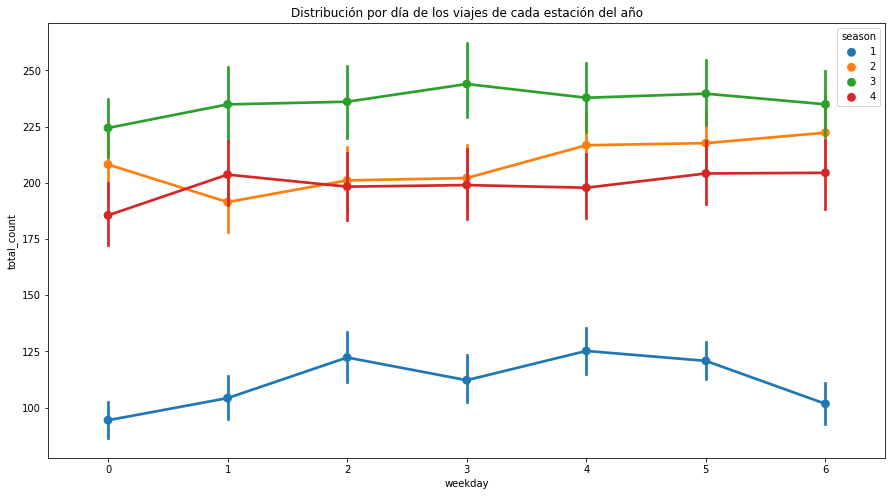

In [14]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['weekday',
                           'total_count',
                           'season']],
             x='weekday',y='total_count',
             hue='season',ax=ax)
ax.set(title="Distribución por día de los viajes de cada estación del año")

[Text(0.5, 1.0, 'cantidad de viajes por mes')]

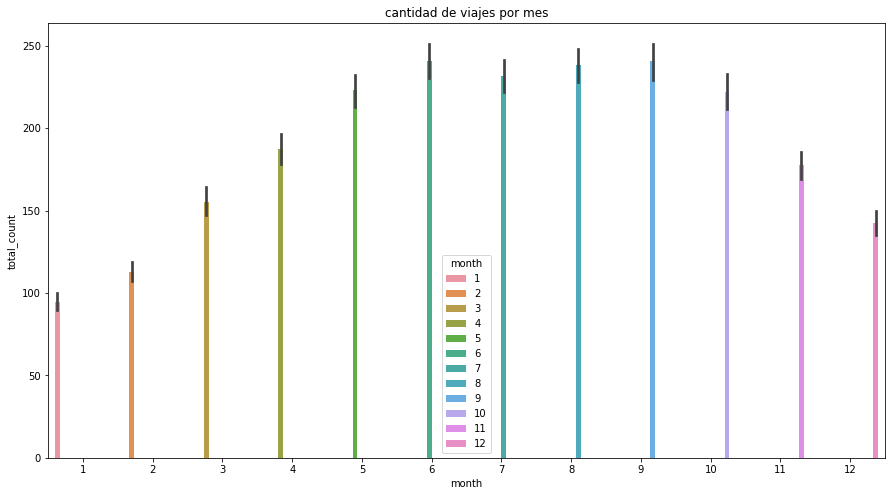

In [19]:

fig,ax = plt.subplots()
sn.barplot(data=hour_df[['month',
                         'total_count']],
            x='month', y='total_count',
           hue='month',ax=ax)
ax.set(title="cantidad de viajes por mes")

## Correlación

La correlación nos ayuda a entender las relaciones entre diferentes atributos de nuestros datos.

Es importante entender que la correlación no implica causalidad.

El siguiente código prepara una matriz correlacional  usando la función **corr()** de pandas. 

Después usamos una gráfica llamada mapa de calor para mostrar la matriz.

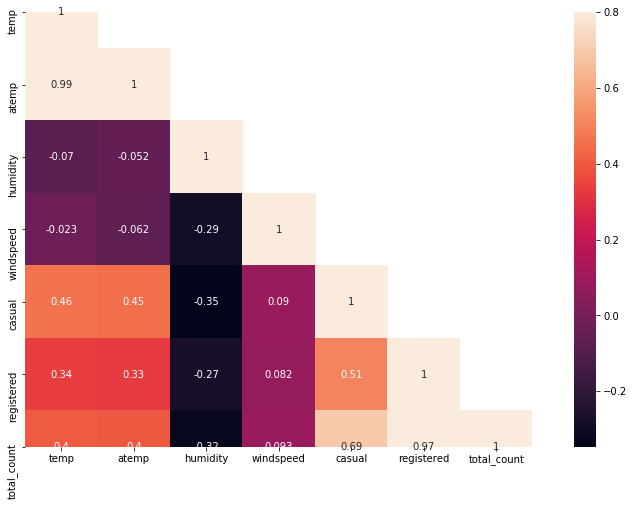

In [20]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)


Las dos variables que cuentan los tipos de usuarios muestran una fuerte correlación con el total de los viajes. 

De manera similar los atributos de temp y atemp muestran una correlación alta, pero ninguno de los otros atributos muestran una correlación alta.

## Análisis de regresión

Es una técnica de modelado estadístico. Comprende el proceso de investigar relaciones entre variables dependientes e independientes.

La regresión se refiere a la estimación de variables contínuas, al contrario de la clasificación, que estima variables discretas.

La relación de altura y peso es un ejemplo clásico de regresión. Por ejemplo se dice que el peso de una persona depende de su estatura. Por lo tanto, podemos formular una función de regresión para estimar el peso (variable dependiente) de una persona dada su altura (variable independiente).


## Tipos de regresión

Todas las técnicas de modelado de regresión involucran lo siguiente:

La variable independiente X

La variable dependiente u objetivo Y

Un parámetro desconocido β 

Una función de regresión relaciona estas entidades de la siguiente manera:

$$ Y=f\left(X,\beta \right) $$

La función f() necesita ser especificada o aprendida del dataset.


Algunas técnicas de regresión comúnmente usadas son:

* **Regresión lineal:** mapea una relación lineal entre las variables dependientes e independientes. La meta es tratar de minimizar el error.

* **Regresión logística:** cuando la variable dependiente es binaria (Positivo o Negativo), esta técnica es usada. Esta técnica tiene más en común con técnicas de clasificación que de regresión.

* **Regresión no lineal:** para casos en los que la variable dependiente se relaciona de manera polinominal a la variable independiente.


## Modelado

Vamos a empezar a crear un modelo de nuestro dataset para poder predecir la demanda de bicicletas para una fecha específica. 

Nuestro dataset contiene varias variables categóricas, necesitamos codificar las nominales antes de usarlas en nuestro proceso de modelado.

In [21]:
def fit_transform_ohe(df,col_name):
    # codificar la columna
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

def transform_ohe(df,le,ohe,col_name):
    # codificado de etiquetas
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df



Para probar nuestro modelo vamos a dividir nuestro dataset en valores para entrenamiento y pruebas.

In [22]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


Ahora vamos a recorrer una lista de variables categóricas para transformar y preparar una lista de atributos codificados.

In [23]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [24]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

C:\Users\lrchi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\lrchi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

En el siguiente paso unimos las categorías numéricas y las codificadas en un dataset que usaremos para nuestro modelo.

In [25]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## Entrenamiento

En **scikit** tenemos un módulo llamado **linear_model** para crear nuestro modelo de regresión lineal. 
Como todos los algoritmos de scikit para aprendizaje automático, también usa los métodos **fit()** y **predict()**.

In [0]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

Para evitar el overfitting en nuestro moodelo en lugar del método **predict()** usaremos el de validación cruzada **cross_val_predict()**

In [0]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

Ahora vamos a graficar nuestro modelo para ver su comportamiento.

In [0]:
fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [0]:
lin_reg.fit(X,y)

## Pruebas

El modelo de regresión lineal que ya entrenamos necesita ser validado con un dataset que no ha leído, este dataset ya lo hemos construido previamente con el método de **train_test_split()**.

Pero antes, tenemos que procesarlo de la misma manera que hicimos con el dataset de entrenamiento.

In [0]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

In [0]:
test_df_new.head()

Para el último paso, vamos a usar el método de **predict()** y comparar nuestros resultados para conocer el desempeño de nuestro modelo.

In [0]:


X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred



In [0]:


r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))



In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

Ejercicio

Probar otros modelos de regresión (árbol de decisiones)